In [1]:
%cd ..

/mnt/work/Code/hydra-diffusion


## Denoising Diffusion Probabilistic Models

In [2]:
import torch
import pytorch_lightning as pl
from src.models.vae_module import VAEModule
from src.data.mnist_datamodule import MNISTDataModule
from torch.utils.data import DataLoader
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

### Load pretrained model

In [3]:
last_checkpoint = "/mnt/work/Code/hydra-diffusion/logs/train/runs/2023-07-22_17-34-51/checkpoints/last.ckpt"
last_checkpoint = "/mnt/work/Code/hydra-diffusion/logs/train/runs/2023-07-22_17-39-34/checkpoints/last.ckpt"

In [4]:
model = VAEModule.load_from_checkpoint(last_checkpoint).to("cuda")

/home/ozo/miniconda3/lib/python3.8/site-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  rank_zero_warn(


VAE(
  (encoder): Sequential(
    (0): Linear(in_features=1024, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): Tanh()
    (10): Linear(in_features=8, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): Tanh()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=64, bias=True)
    (7): Tanh()
    (8): Linear(in_features=64, out_features=128, bias=True)
    (9): Tanh()
    (10): Linear(in_features=128, out_features=1024, bias=True)
    (11): Sigmoid()
  )
)


### Inference

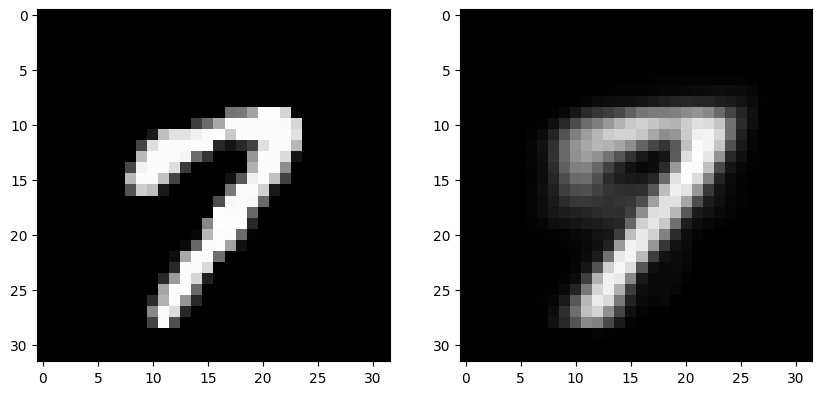

In [7]:
datamodule = MNISTDataModule()
datamodule.setup()

# visualize samples
inp = datamodule.data_train[15][0]
out = model(inp.unsqueeze(0).to("cuda"))


# Visualize samples side by side
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(inp.squeeze(), cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(out[0].squeeze().cpu().detach().numpy(), cmap="gray")

plt.show()
